In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [72]:
train_data = pd.read_csv('/kaggle/input/advanced-dls-spring-2021/train.csv')
test_data = pd.read_csv('/kaggle/input/advanced-dls-spring-2021/test.csv')
train_data

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3,30.40,82.15,Male,0,No,No,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,No,Electronic check,0
5278,50,44.45,2188.45,Male,0,Yes,No,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),0
5279,1,55.05,55.05,Male,0,No,No,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check,0
5280,29,76.00,2215.25,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),0


# Метрика

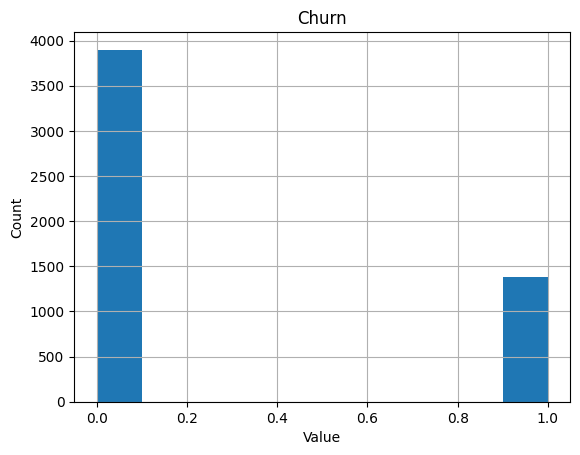

In [73]:
train_data['Churn'].hist()
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Churn'.format('Churn'))
plt.show()

Целевой переменной является переменная Churn, которая принимает значения 0 и 1. Следовательно необходимо решить задачу классификации. <br>
По графику видно, что данные достаточно несбалансированные, поэтому для оценки будем использовать метрику ROC-AUC.

# Исследование

In [74]:
# numeric columns
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# categorical columns
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'
warnings.filterwarnings('ignore')

Объеденим данные для train и test, чтобы обрабатывать их одинаковым образом

In [75]:
data = pd.concat([train_data, test_data], ignore_index=True)
target = train_data[target_col]
data = data.drop(['Churn'], axis=1)
data

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic)
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,71,105.15,7555,Female,0,Yes,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic)
7039,13,20.85,272.35,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check
7040,2,91.45,171.45,Male,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,No,Month-to-month,Yes,Electronic check
7041,19,89.10,1620.8,Female,0,Yes,No,Yes,Yes,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,Yes,Electronic check


Проверим, есть ли незаполненные значения:

In [76]:
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
dtype: int64

# Анализ данных

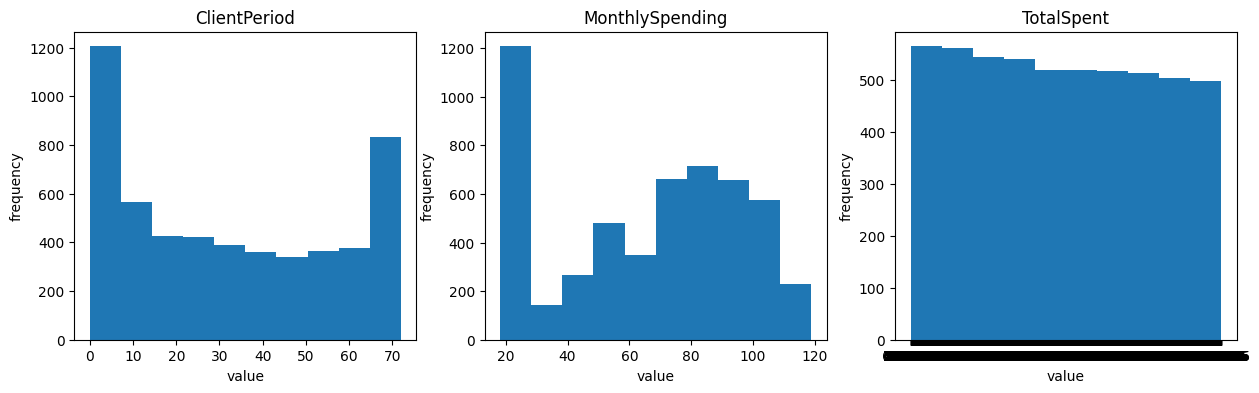

In [77]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

axs[0].hist(train_data['ClientPeriod'])
axs[0].set_title('ClientPeriod')
axs[0].set_xlabel('value')
axs[0].set_ylabel('frequency')

axs[1].hist(train_data['MonthlySpending'])
axs[1].set_title('MonthlySpending')
axs[1].set_xlabel('value')
axs[1].set_ylabel('frequency')

axs[2].hist(train_data['TotalSpent'])
axs[2].set_title('TotalSpent')
axs[2].set_xlabel('value')
axs[2].set_ylabel('frequency')

plt.show()

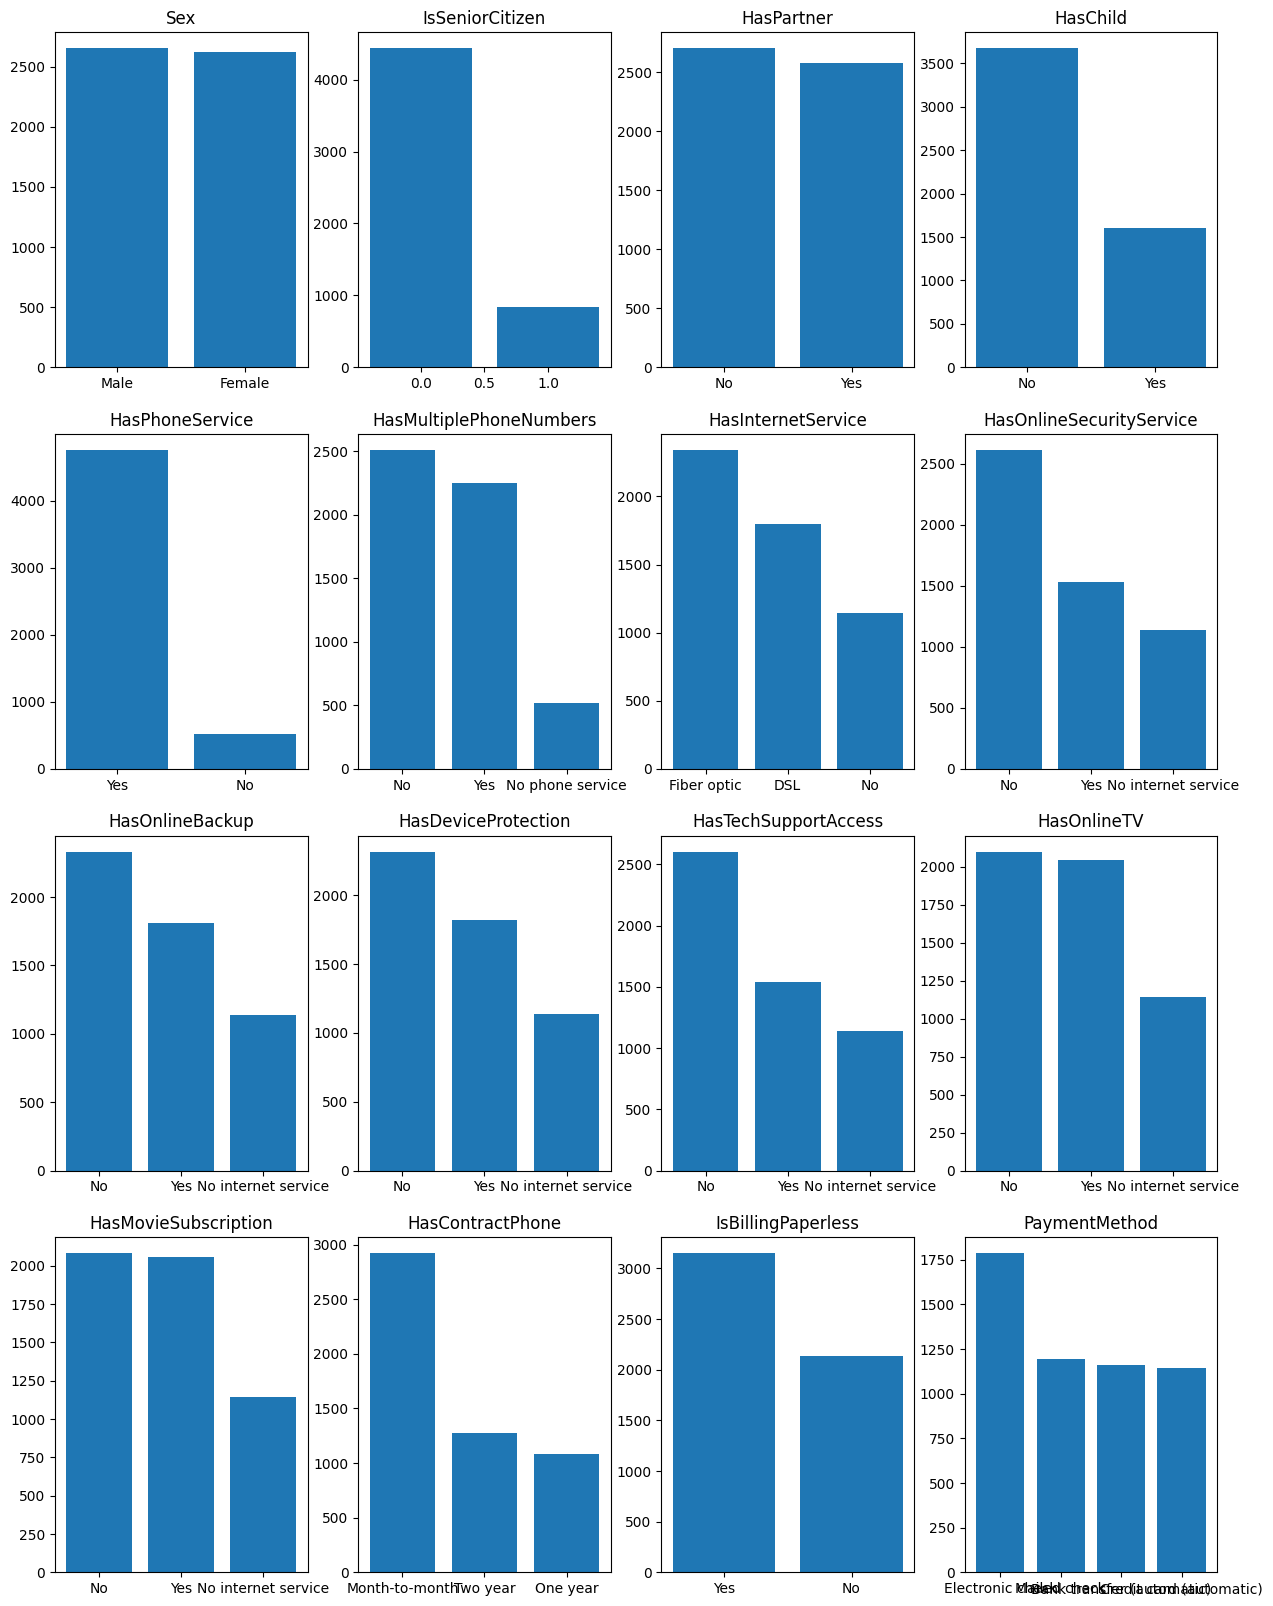

In [78]:
fig, axs_cat = plt.subplots(4, 4, figsize=(15, 20))
cat_columns = train_data.columns.drop(['ClientPeriod', 'MonthlySpending', 'TotalSpent', 'Churn'])

f = 0
for i in range(0, 4):
    for j in range(0, 4):
        axs_cat[i][j].bar(train_data[cat_columns[f]].value_counts().index, train_data[cat_columns[f]].value_counts().values)
        axs_cat[i][j].set_title(cat_columns[f])
        f += 1

plt.show()

# Подготовка данных

Чтобы мы могли использовать линейные модели, категориальные переменные необходимо закодировать. <br>
Переменные, которые имеют 2 уникальных значения закодируем через LabelEncoding, а переменные, которые имеют 3 и более через OneHotEncoding.

In [79]:
data['Sex'] = data['Sex'].apply(lambda x: 1 if x == 'Female' else 0)
data['Sex'] = data['Sex'].apply(lambda x: 1 if x == 'Female' else 0)

data['HasPartner'] = data['HasPartner'].apply(lambda x: 1 if x == 'Yes' else 0)
data['HasPartner'] = data['HasPartner'].apply(lambda x: 1 if x == 'Yes' else 0)

data['HasChild'] = data['HasChild'].apply(lambda x: 1 if x == 'Yes' else 0)
data['HasChild'] = data['HasChild'].apply(lambda x: 1 if x == 'Yes' else 0)

data['HasPhoneService'] = data['HasPhoneService'].apply(lambda x: 1 if x == 'Yes' else 0)
data['HasPhoneService'] = data['HasPhoneService'].apply(lambda x: 1 if x == 'Yes' else 0)

data['IsBillingPaperless'] = data['IsBillingPaperless'].apply(lambda x: 1 if x == 'Yes' else 0)
data['IsBillingPaperless'] = data['IsBillingPaperless'].apply(lambda x: 1 if x == 'Yes' else 0)

К оставшимся категориальным переменным применим OneHotEncoder

In [80]:
cat_cols_for_one_hot = [
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'PaymentMethod'
]

data = pd.get_dummies(data, columns=cat_cols_for_one_hot)

data = data.replace([True, False], [1,0])

In [81]:
data

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,IsBillingPaperless,HasMultiplePhoneNumbers_No,...,HasMovieSubscription_No,HasMovieSubscription_No internet service,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,55,19.50,1026.35,0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,1
1,72,25.85,1872.2,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
2,1,75.90,75.9,0,0,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
3,32,79.30,2570,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
4,60,115.25,6758.45,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,71,105.15,7555,0,0,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
7039,13,20.85,272.35,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
7040,2,91.45,171.45,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,19,89.10,1620.8,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0


Проверим, что все признаки числовые, чтобы мы могли применять линейные модели

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 40 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   ClientPeriod                                  7043 non-null   int64  
 1   MonthlySpending                               7043 non-null   float64
 2   TotalSpent                                    7043 non-null   object 
 3   Sex                                           7043 non-null   int64  
 4   IsSeniorCitizen                               7043 non-null   int64  
 5   HasPartner                                    7043 non-null   int64  
 6   HasChild                                      7043 non-null   int64  
 7   HasPhoneService                               7043 non-null   int64  
 8   IsBillingPaperless                            7043 non-null   int64  
 9   HasMultiplePhoneNumbers_No                    7043 non-null   i

Заметим, что осталась одна фича - TotalSpent, котора имеет тип object. <br>
Преобразуем ее к числовому значению

In [83]:
data['TotalSpent'] = pd.to_numeric(data['TotalSpent'], errors = "coerce")
data['TotalSpent'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: TotalSpent
Non-Null Count  Dtype  
--------------  -----  
7032 non-null   float64
dtypes: float64(1)
memory usage: 55.1 KB


In [84]:
data.isna().sum()

ClientPeriod                                     0
MonthlySpending                                  0
TotalSpent                                      11
Sex                                              0
IsSeniorCitizen                                  0
HasPartner                                       0
HasChild                                         0
HasPhoneService                                  0
IsBillingPaperless                               0
HasMultiplePhoneNumbers_No                       0
HasMultiplePhoneNumbers_No phone service         0
HasMultiplePhoneNumbers_Yes                      0
HasInternetService_DSL                           0
HasInternetService_Fiber optic                   0
HasInternetService_No                            0
HasOnlineSecurityService_No                      0
HasOnlineSecurityService_No internet service     0
HasOnlineSecurityService_Yes                     0
HasOnlineBackup_No                               0
HasOnlineBackup_No internet ser

Заметим, что остались данные, имеющие значение Nan. <br>
Заменим их на медиану

In [85]:
median_value = data['TotalSpent'].median()
data['TotalSpent'].fillna(median_value, inplace=True)
data.isna().sum()

ClientPeriod                                    0
MonthlySpending                                 0
TotalSpent                                      0
Sex                                             0
IsSeniorCitizen                                 0
HasPartner                                      0
HasChild                                        0
HasPhoneService                                 0
IsBillingPaperless                              0
HasMultiplePhoneNumbers_No                      0
HasMultiplePhoneNumbers_No phone service        0
HasMultiplePhoneNumbers_Yes                     0
HasInternetService_DSL                          0
HasInternetService_Fiber optic                  0
HasInternetService_No                           0
HasOnlineSecurityService_No                     0
HasOnlineSecurityService_No internet service    0
HasOnlineSecurityService_Yes                    0
HasOnlineBackup_No                              0
HasOnlineBackup_No internet service             0


Теперь все данные имеют численные значения.

Отскалируем данные, чтобы применять линейные модели

In [86]:
from sklearn.preprocessing import StandardScaler

Предварительно разделим данные обратно на train и test

In [87]:
X_test = data[5282:]
X_train = data[:5282]

In [88]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Логистическая регрессия

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

Подберем гиперпараметры с помощью кросс валидации

In [90]:
log_regr = LogisticRegression()

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [100, 10, 1, 0.1, 0.01, 0.001],
    'solver': ['liblinear', 'saga']
}

grid_search = GridSearchCV(estimator=log_regr, param_grid=param_grid, cv=5, scoring='roc_auc')

grid_search.fit(X_train, target)
params = grid_search.best_params_
print(params)
best_score = grid_search.best_score_
print("ROC AUC на валидации:", best_score)

{'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
ROC AUC на валидации: 0.8438908182567554


In [91]:
train = X_train

# Градиентный бустинг

In [92]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split

In [93]:
train_data = train_data.drop(['Churn'], axis=1)

In [94]:
X_train, X_valid, y_train, y_valid = train_test_split(train_data, target, test_size=0.2, random_state=42)

catboost_default = CatBoostClassifier(cat_features=cat_cols)
catboost_default.fit(X_train, y_train, eval_set=(X_valid, y_valid), early_stopping_rounds=20, verbose=False)

y_pred_default = catboost_default.predict_proba(X_valid)[:, 1]
roc_auc_default = roc_auc_score(y_valid, y_pred_default)
print("ROC AUC для CatBoost с параметрами по умолчанию:", roc_auc_default)


ROC AUC для CatBoost с параметрами по умолчанию: 0.8272896445359759


In [95]:
best_roc_auc = 0
best_params = {}

for n_estimators in [50, 100, 200]:
    for learning_rate in [0.1, 0.01, 0.001]:
        catboost = CatBoostClassifier(
            cat_features=cat_cols,
            n_estimators=n_estimators,
            learning_rate=learning_rate
        )
        catboost.fit(X_train, y_train, eval_set=(X_valid, y_valid), early_stopping_rounds=20, verbose=False)
        y_pred = catboost.predict_proba(X_valid)[:, 1]
        roc_auc = roc_auc_score(y_valid, y_pred)
        if roc_auc > best_roc_auc:
            best_roc_auc = roc_auc
            best_params = {'n_estimators': n_estimators, 'learning_rate': learning_rate}

print("Лучшая комбинация параметров:")
print(best_params)
print("Лучшее значение ROC AUC на валидационной выборке:", best_roc_auc)

Лучшая комбинация параметров:
{'n_estimators': 200, 'learning_rate': 0.1}
Лучшее значение ROC AUC на валидационной выборке: 0.8293860418725353


Как можно видеть, на валидационных данных логистическая регрессия показала лучший результат, поэтому ее и будем использовать

In [96]:
best_model = LogisticRegression(**params)
best_model.fit(train, target)

LogisticRegression(C=100, penalty='l1', solver='liblinear')

In [98]:
submission = pd.read_csv('/kaggle/input/advanced-dls-spring-2021/submission.csv')

submission['Churn'] = best_model.predict_proba(X_test)[:, 1]
submission.to_csv('./submission.csv', index = False)